## UTKARSH TRIPATHI

# Task 04 - Decision Tree Algorithm

## Contents

### [1. Introduction](#intro)

### [2. Data Preparation](#data)
   * **Import the required libraries**
   * **Load the dataset**
   
### [3. Exploratory Analysis](#explore)

### [4. Model Architecture](#model)
   * **Split the dataset**
   * **Train model**

### [5. Model Evaluation](#eval)
   * **Evaluation Metrics**
   * **Observations**

### [6. Visualize the Decision Tree](#visual)  

<a id="intro"></a>
### 1. Introduction

#### Problem statement
For the ‘Iris’ dataset, create a Decision Tree classifier and visualize it graphically. Test its accuracy using suitable accuracy metrics.

#### Dataset link: https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

<a id="data"></a>
### 2. Data Preparation

#### Import the required libraries

In [1]:
import pandas as pd
import numpy as np

# Libraries used for generating plots.
import matplotlib.pyplot as plt
import seaborn as sns

# Iris data set
from sklearn.datasets import load_iris

# For Decision Tree Classification model
from sklearn import tree

# Accuracy Metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

%matplotlib inline

import warnings

warnings.filterwarnings("ignore")

#### Load the dataset

In [2]:
# Load the dataset and view the top 5 rows.
iris = load_iris()

# Forming the iris dataframe
x = pd.DataFrame(iris.data, columns=iris.feature_names)
print(x.head(5))

y = iris.target

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


<a id="explore"></a>
### 3. Exploratory Analysis

In [3]:
# Get the shape of dataset.
x.shape

(150, 4)

The dataset contains 150 rows and 4 feature columns.

In [4]:
# Get dataset information.
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
# Identify columns with null values.
x.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

None of the columns contain null values.

In [6]:
# Describe the dataset by basic statistical calculations.
x.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Generate a quick summary containing count, mean, standard deviation, minimum, maximum and quartile ranges for the dataset.

<a id="model"></a>
### 4. Model Architecture

#### Split the dataset

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=17)

#### Train model

In [8]:
# Fit a Decision Tree Classifier
clf = tree.DecisionTreeClassifier(random_state=17)
clf = clf.fit(X_train, y_train)

<a id="eval"></a>
### 5. Model Evaluation

#### Evaluation Metrics

In [9]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=iris.target_names))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.96      0.93      0.94        27
   virginica       0.89      0.94      0.92        18

    accuracy                           0.95        60
   macro avg       0.95      0.96      0.95        60
weighted avg       0.95      0.95      0.95        60


Accuracy: 0.9500


#### Observations:
The accuracy of the model is 95%.

**Precision** is the accuracy of positive predictions, high value of precission for each class indicate a good fit.<br>
    &nbsp; Precision = TP/(TP + FP)

**Recall** is the fraction of positives that were correctly identified, high value indicates a good fit.<br>
    &nbsp; Recall = TP/(TP+FN)
    
**F1 score** is a weighted harmonic mean of precision and recall, scores lies in the range [0,1]. Values closer to 1 are better.<br>
    &nbsp; F1 Score = 2*(Recall * Precision) / (Recall + Precision)
    
Here,<br>
TP - True Positive (Actually positive and predicted positive).<br>
FP - False Positive (Actually negative but predicted positive).<br>
TN - True Negative (Actually negative and predicted negative).<br>
FN - False Negative (Actually positive but predicted negative).


<a id="visual"></a>
### 6. Visualize the Decision Tree

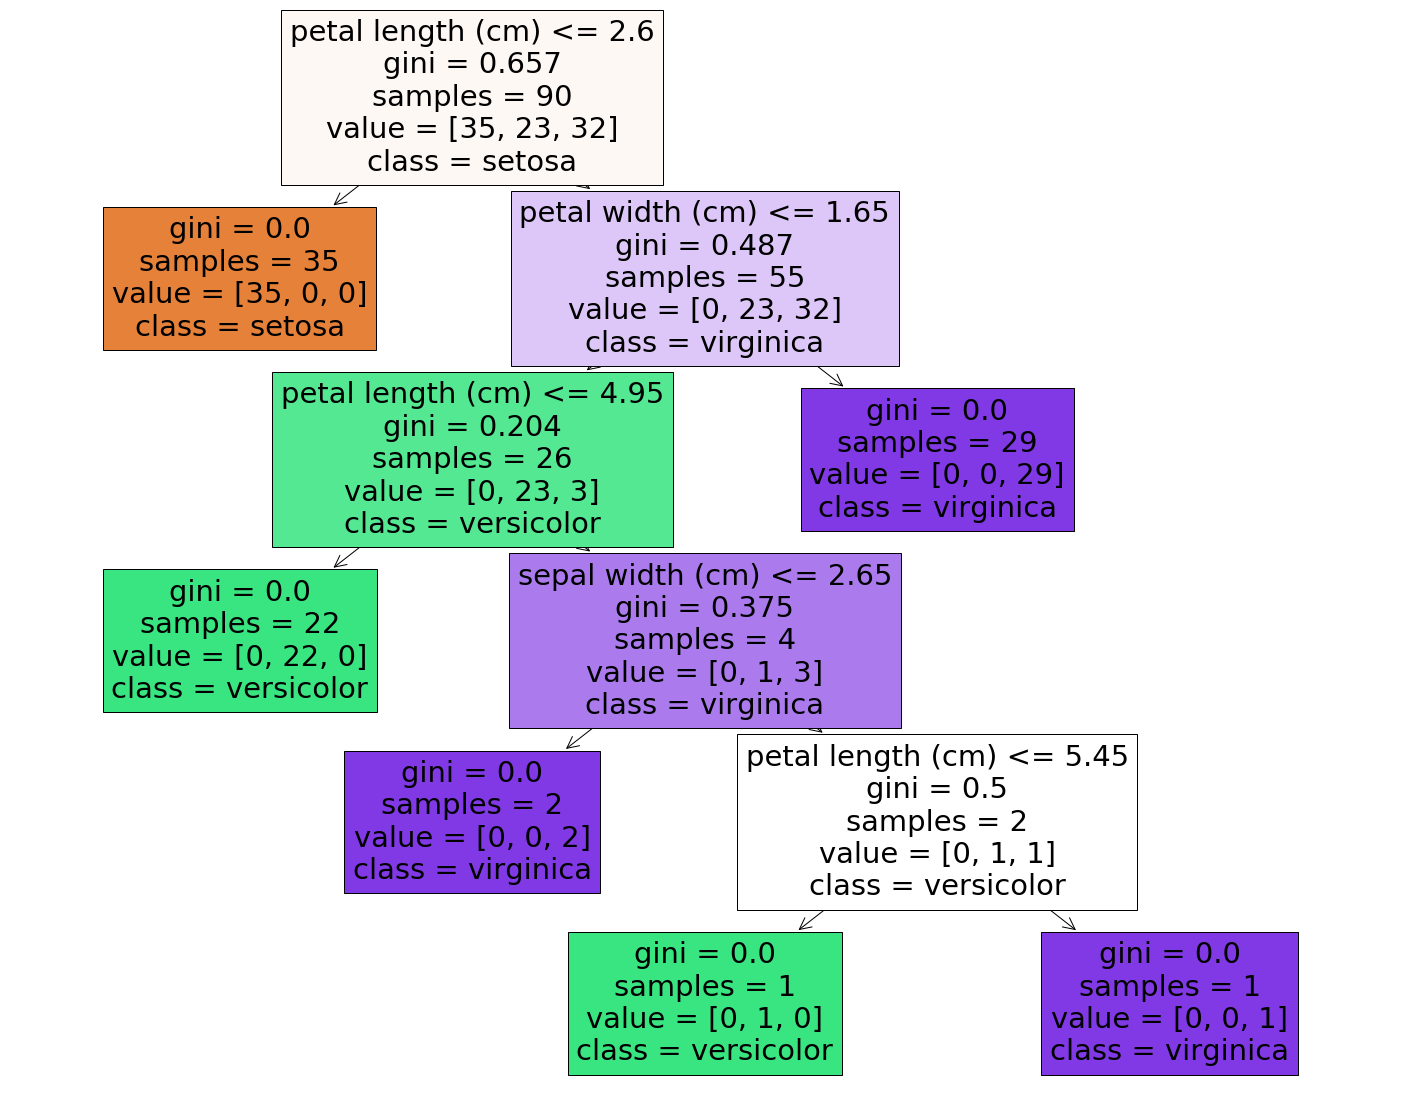

In [10]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)
